# Scikit-learn Tutorial

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## 1. Load and Explore Dataset

In [2]:
# This dataset contains information collected by the U.S Census Service
# concerning housing in the area of Boston Mass.
#
# The data was originally published by Harrison, D. and Rubinfeld, D.L. 
# 'Hedonic prices and the demand for clean air', J. Environ. 
# Economics & Management, vol.5, 81-102, 1978.
#
# Variables in order:
#  0 CRIM     per capita crime rate by town
#  1 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  2 INDUS    proportion of non-retail business acres per town
#  3 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  4 NOX      nitric oxides concentration (parts per 10 million)
#  5 RM       average number of rooms per dwelling
#  6 AGE      proportion of owner-occupied units built prior to 1940
#  7 DIS      weighted distances to five Boston employment centres
#  8 RAD      index of accessibility to radial highways
#  9 TAX      full-value property-tax rate per $10,000
# 10 PTRATIO  pupil-teacher ratio by town
# 11 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 12 LSTAT    % lower status of the population
#
# http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
#
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y = True)

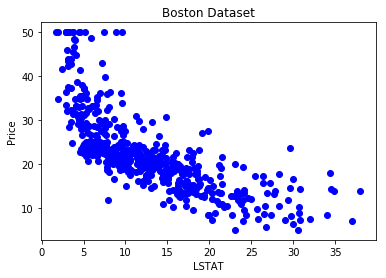

In [3]:
# Explore data relations
plt.plot(X[:,12], y, 'bo')
plt.title('Boston Dataset')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

In [12]:
# TODO: explore means np.mean
np.mean(X, axis=0)

array([  3.59376071e+00,   1.13636364e+01,   1.11367787e+01,
         6.91699605e-02,   5.54695059e-01,   6.28463439e+00,
         6.85749012e+01,   3.79504269e+00,   9.54940711e+00,
         4.08237154e+02,   1.84555336e+01,   3.56674032e+02,
         1.26530632e+01])

In [13]:
# TODO: explore variance np.var
np.var(X, axis=0)

array([  7.37586143e+01,   5.42861840e+02,   4.69714297e+01,
         6.43854770e-02,   1.34010989e-02,   4.92695216e-01,
         7.90792473e+02,   4.42525226e+00,   7.56665313e+01,
         2.83486236e+04,   4.67772630e+00,   8.31828042e+03,
         5.08939794e+01])

## 2. Preprocess Dataset

In [17]:
# Scale data
from sklearn.preprocessing import StandardScaler
#
#   StandardScaler(copy=True, with_mean=True, with_std=True)
#
# TODO:
#  1. estimate data stats using StandardScaler.fit method
#  2. apply scaling transformation using StandardScaler.transform
#  3. explore result using np.mean and np.var
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [18]:
np.mean(X_scaled, axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15,
         4.70199198e-16,   2.49032240e-15,  -1.14523016e-14,
        -1.40785495e-15,   9.21090169e-16,   5.44140929e-16,
        -8.86861950e-16,  -9.20563581e-15,   8.16310129e-15,
        -3.37016317e-16])

In [19]:
np.var(X_scaled, axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [41]:
np.min(X_scaled, axis=0)

array([-0.41771335, -0.48772236, -1.55784179, -0.27259857, -1.46588193,
       -3.88024936, -2.33543704, -1.26706919, -0.98284286, -1.31399004,
       -2.70737911, -3.9071933 , -1.5311271 ])

In [42]:
np.max(X_scaled, axis=0)

array([ 9.94173502,  3.80423444,  2.42256516,  3.66839786,  2.73234648,
        3.55504427,  1.11749449,  3.96051769,  1.66124525,  1.79819419,
        1.63882832,  0.44105193,  3.54877081])

## 3. Train Model 

In [36]:
# Train linear regression
from sklearn.linear_model import LinearRegression
#
#   LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
#
# TODO: create model instance and train it on scaled
#       data using LinearRegression.fit method
model = LinearRegression().fit(X_scaled, y)

In [39]:
model.coef_

array([-0.92041113,  1.08098058,  0.14296712,  0.68220346, -2.06009246,
        2.67064141,  0.02112063, -3.10444805,  2.65878654, -2.07589814,
       -2.06215593,  0.85664044, -3.74867982])

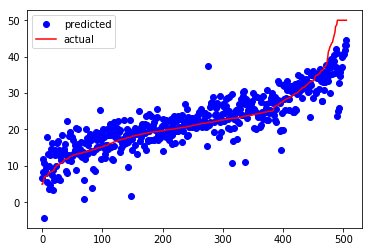

In [28]:
# Plot predictions
predicted = model.predict(X_scaled)

pairs = np.array(sorted(zip(y, predicted)))
plt.plot(range(0, len(pairs)), pairs[:, 1], 'bo',
         range(0, len(pairs)), pairs[:, 0], 'r-')

plt.legend(['predicted', 'actual'])
plt.show()

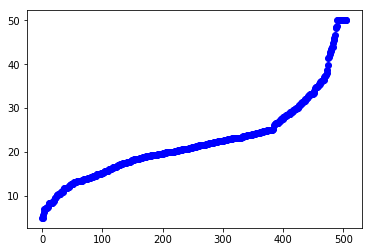

In [30]:
plt.plot(range(0, len(y)), sorted(y), 'bo')
plt.show()

In [40]:
# Estimate model quality
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#
#   r2_score(y_true, y_pred, sample_weight=None, multioutput=None)
#   mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
#
# TODO: print R2 and MSE scores
print('r2: ', r2_score(y, predicted))
print('mse: ', mean_squared_error(y, predicted))

r2:  0.740607742865
mse:  21.8977792177


## 4. Cross-Validation

In [51]:
# Estimate model quality using cross-validation
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
#   KFold(n_splits=3, shuffle=False, random_state=None)
#
#   cross_val_score(estimator, X, y=None, groups=None, scoring=None,
#                   cv=None, n_jobs=1, verbose=0, fit_params=None, 
#                   pre_dispatch='2*n_jobs')
#
# TODO: estimate average R2 score using 4-fold corss validation

kfold = KFold(n_splits=4, shuffle=True, random_state=145)

scores = cross_val_score(LinearRegression(),
                         X_scaled, y, groups=None,
                         scoring = make_scorer(r2_score),
                         cv = kfold)

In [53]:
np.average(scores)

0.71682385603300292

## 5. Pipeline Scaler and LinearRegression

In [64]:
from sklearn.pipeline import Pipeline
#
#   Pipeline(steps=[('name', model),])
#
# TODO: 
#  1. combine scaler and linear gregression using pipeline
#  2. etimate quality using cross_val_score

pipeline = Pipeline(steps=[('scale', scaler),
                           ('model', LinearRegression())])

In [65]:
scores = cross_val_score(pipeline,
                         X, y, groups=None,
                         scoring = make_scorer(r2_score),
                         cv = kfold)

In [66]:
np.average(scores)

0.71682385603300269

## 6. Optimize model parameters using GridSearch

In [75]:
# GridSearch
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# 
#   Ridge(alpha=1.0, fit_intercept=True, normalize=False, 
#         copy_X=True, max_iter=None, tol=0.001, 
#         solver='auto', random_state=None)
#
#   GridSearchCV(estimator, param_grid, scoring=None, fit_params=None,
#                n_jobs=1, iid=True, refit=True, cv=None, verbose=0, 
#                pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)   
#
# TODO:
#  1. create pipeline with Scaler and Ridge regression
#  2. estimate quality for alpha: 1, 1.5, 2, 2.5


pipeline = Pipeline(steps=[('scale', StandardScaler()),
                           ('model', Ridge(alpha=1.0))])

param_grid = {'model__alpha': [0, 1, 1.5, 2, 2.5]}

grid = GridSearchCV(pipeline, param_grid, 
                    scoring=make_scorer(r2_score),
                    cv=kfold)


In [76]:
model = grid.fit(X, y)

In [77]:
model.cv_results_['mean_test_score']

array([ 0.71674534,  0.71679496,  0.71680603,  0.71680903,  0.71680466])

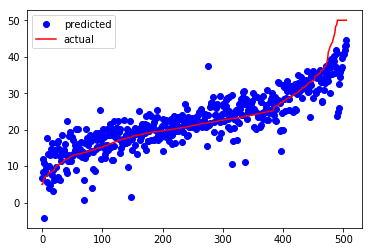

In [80]:
# Plot predictions
predicted = grid.best_estimator_.predict(X)

pairs = np.array(sorted(zip(y, predicted)))
plt.plot(range(0, len(pairs)), pairs[:, 1], 'bo',
         range(0, len(pairs)), pairs[:, 0], 'r-')

plt.legend(['predicted', 'actual'])
plt.show()

## 7. Compare different models

In [81]:
# Try ensemble models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

# TODO: compare different models using grid search


pipeline = Pipeline(steps=[('scale', StandardScaler()),
                           ('model', Ridge(alpha=1.0))])

param_grid = {'model': [Ridge(alpha=1.5),
                        RandomForestRegressor(),
                        GradientBoostingRegressor(),
                        BaggingRegressor()]}

grid = GridSearchCV(pipeline, param_grid, 
                    scoring=make_scorer(r2_score),
                    cv=kfold)

In [83]:
model = grid.fit(X, y)

In [84]:
model.cv_results_['mean_test_score']

array([ 0.71680603,  0.82810758,  0.87347652,  0.8197507 ])

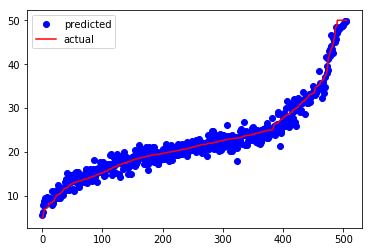

In [85]:
# Plot predictions
predicted = model.best_estimator_.predict(X)

pairs = np.array(sorted(zip(y, predicted)))
plt.plot(range(0, len(pairs)), pairs[:, 1], 'bo',
         range(0, len(pairs)), pairs[:, 0], 'r-')

plt.legend(['predicted', 'actual'])
plt.show()